In [1]:
%matplotlib inline

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


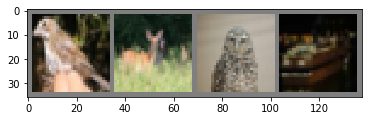

 bird  deer  bird  ship


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [5]:
from models.lenet import LeNet


net = LeNet()

In [6]:
import torch.nn as nn
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [7]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)

LeNet(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=248, bias=True)
  (fc2): Linear(in_features=248, out_features=124, bias=True)
  (fc3): Linear(in_features=124, out_features=84, bias=True)
  (fc4): Linear(in_features=84, out_features=10, bias=True)
)

In [8]:
best = [float('inf'), None]

for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
        if running_loss < best[0]:
            best[1] = net.state_dict()
            best[0] = running_loss

print('Finished Training')

torch.Size([4, 3, 32, 32])
torch.Size([4, 8, 15, 15])
torch.Size([4, 16, 6, 6])
[1,  2000] loss: 2.301
[1,  4000] loss: 2.156
[1,  6000] loss: 1.905
[1,  8000] loss: 1.726
[1, 10000] loss: 1.599
[1, 12000] loss: 1.508
[2,  2000] loss: 1.418
[2,  4000] loss: 1.385
[2,  6000] loss: 1.366
[2,  8000] loss: 1.313
[2, 10000] loss: 1.273
[2, 12000] loss: 1.267
[3,  2000] loss: 1.170
[3,  4000] loss: 1.175
[3,  6000] loss: 1.139
[3,  8000] loss: 1.122
[3, 10000] loss: 1.107
[3, 12000] loss: 1.085
[4,  2000] loss: 1.003
[4,  4000] loss: 0.990
[4,  6000] loss: 0.988
[4,  8000] loss: 0.997
[4, 10000] loss: 1.000
[4, 12000] loss: 0.989
[5,  2000] loss: 0.865
[5,  4000] loss: 0.876
[5,  6000] loss: 0.904
[5,  8000] loss: 0.887
[5, 10000] loss: 0.907
[5, 12000] loss: 0.885
Finished Training


In [9]:
correct = 0
total = 0
net.load_state_dict(best[1])

with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 65 %


In [10]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 72 %
Accuracy of   car : 74 %
Accuracy of  bird : 53 %
Accuracy of   cat : 47 %
Accuracy of  deer : 60 %
Accuracy of   dog : 46 %
Accuracy of  frog : 80 %
Accuracy of horse : 65 %
Accuracy of  ship : 77 %
Accuracy of truck : 76 %
